# Stock Market Analysis of Microsoft, Zoom, and Snowflake

## Daily Return and Cumulative Returns

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas_datareader
import datetime

In [ ]:
import pandas_datareader.data as web

In [ ]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 1, 1)

#start = datetime.datetime(2012, 1, 1)
#end = datetime.datetime(2017, 1, 1)
#tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [ ]:
MSFT_stock = web.DataReader('MSFT', 'yahoo', start, end)
MSFT_stock.head()

ZOOM_stock = web.DataReader('ZM', 'yahoo', start, end)
ZOOM_stock.head()

TSLA_stock = web.DataReader('TSLA', 'yahoo', start, end)
TSLA_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


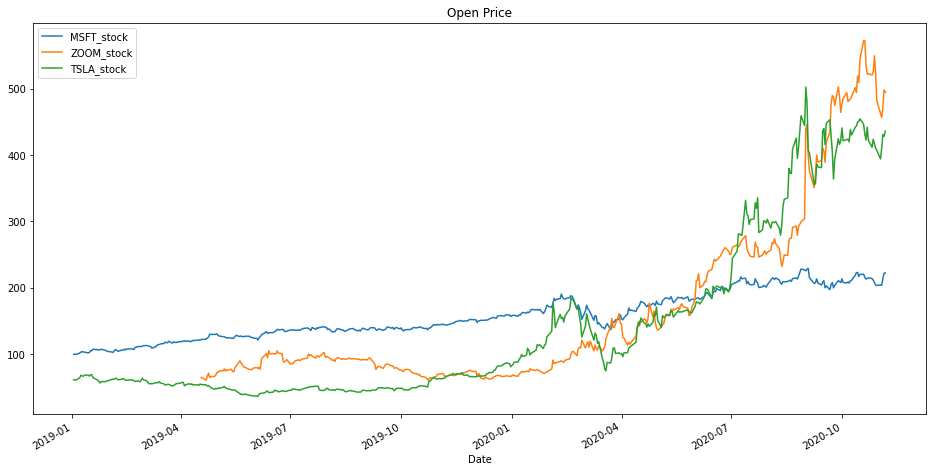

In [ ]:
MSFT_stock['Open'].plot(label='MSFT_stock',figsize=(16,8),title='Open Price')
ZOOM_stock['Open'].plot(label='ZOOM_stock')
TSLA_stock['Open'].plot(label='TSLA_stock')
plt.legend()

____

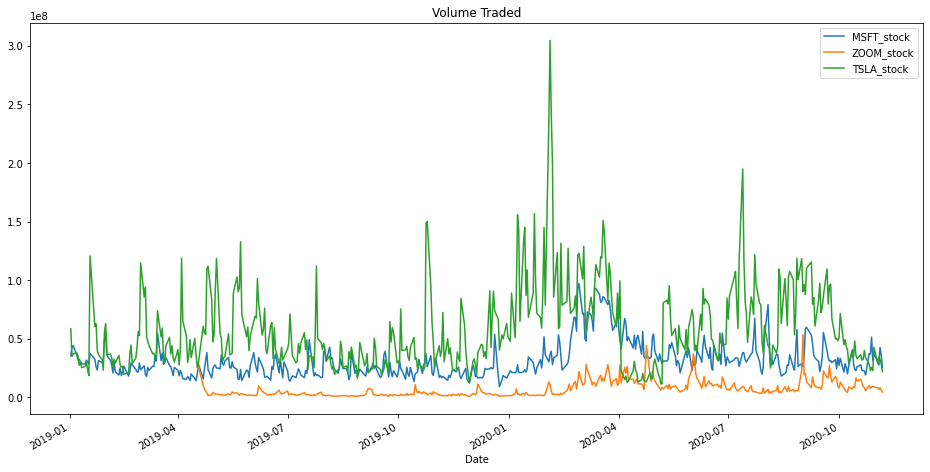

In [ ]:
MSFT_stock['Volume'].plot(label='MSFT_stock',figsize=(16,8),title='Volume Traded')
ZOOM_stock['Volume'].plot(label='ZOOM_stock')
TSLA_stock['Volume'].plot(label='TSLA_stock')
plt.legend()

In [ ]:
MSFT_stock['Volume'].argmax()

291

In [ ]:
MSFT_stock['Total Traded'] = MSFT_stock['Open']*MSFT_stock['Volume']
TSLA_stock['Total Traded'] = TSLA_stock['Open']*TSLA_stock['Volume']
ZOOM_stock['Total Traded'] = ZOOM_stock['Open']*ZOOM_stock['Volume']


Text(0, 0.5, 'Total Traded')

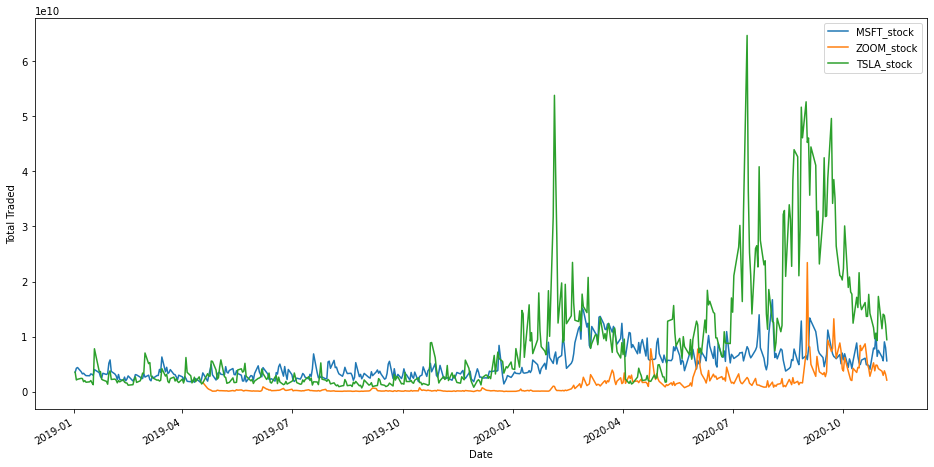

In [ ]:
MSFT_stock['Total Traded'].plot(label='MSFT_stock',figsize=(16,8))
ZOOM_stock['Total Traded'].plot(label='ZOOM_stock')
TSLA_stock['Total Traded'].plot(label='TSLA_stock')
plt.legend()
plt.ylabel('Total Traded')


In [ ]:
ZOOM_stock['Total Traded'].argmax()

346

MA (Moving Averages)

<AxesSubplot:xlabel='Date'>

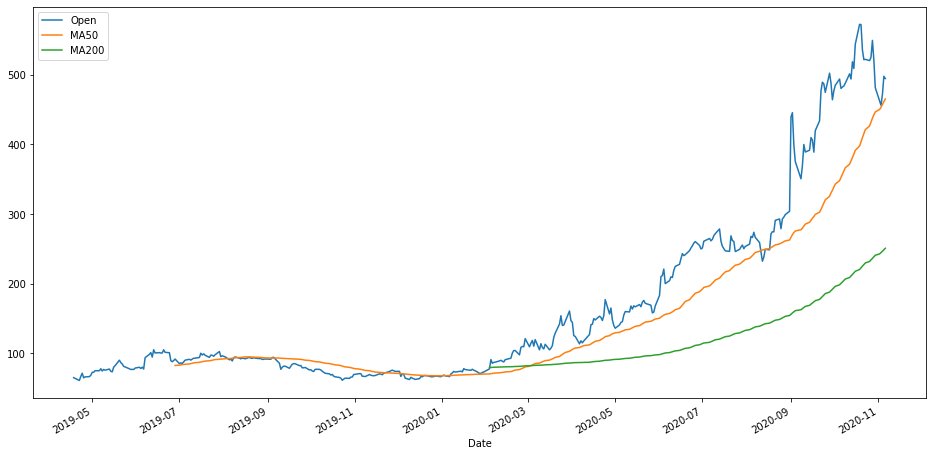

In [ ]:
ZOOM_stock['MA50'] = ZOOM_stock['Open'].rolling(50).mean()
ZOOM_stock['MA200'] = ZOOM_stock['Open'].rolling(200).mean()
ZOOM_stock[['Open','MA50','MA200']].plot(label='ZOOM_stock',figsize=(16,8))

In [ ]:
from pandas.plotting import scatter_matrix

car_comp = pd.concat([MSFT_stock['Open'],ZOOM_stock['Open'],SNOW_stock['Open']],axis=1)

car_comp.columns = ['MSFT_stock Open','ZOOM_stock Open','SNOW_stock Open']

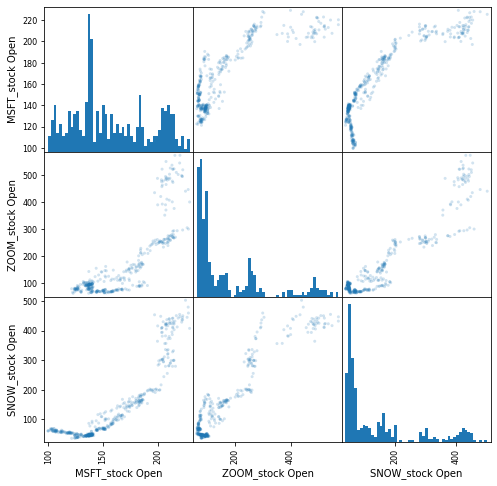

In [ ]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});


In [ ]:
from mpl_finance import candlestick_ohlc

from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [ ]:
# Rest the index to get a column of January Dates
MSFT_stock_reset = MSFT_stock.loc['2019-01':'2019-01'].reset_index()

In [ ]:
# Create a new column of numerical "date" values for matplotlib to use
MSFT_stock_reset['date_ax'] = MSFT_stock_reset['Date'].apply(lambda date: date2num(date))
MSFT_stock_values = [tuple(vals) for vals in MSFT_stock_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]


In [ ]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

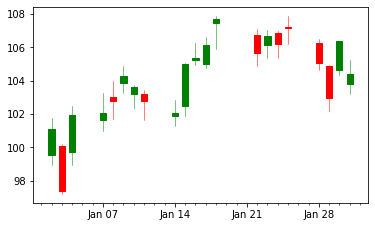

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, MSFT_stock_values, width=0.6, colorup='g',colordown='r');

In [ ]:
# Method 1: Using shift
MSFT_stock['returns'] = (MSFT_stock['Close'] / MSFT_stock['Close'].shift(1) ) - 1

MSFT_stock.head()

MSFT_stock['returns'] = MSFT_stock['Close'].pct_change(1)

MSFT_stock.head()


,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,98.860214,3.517032e+09,NaN
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,95.223351,4.262168e+09,-0.036788
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,99.652115,4.393723e+09,0.046509
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,99.779205,3.624086e+09,0.001275
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,100.502670,3.247244e+09,0.007251


In [ ]:
TSLA_stock['returns'] = TSLA_stock['Close'].pct_change(1)
ZOOM_stock['returns'] = ZOOM_stock['Close'].pct_change(1)



In [ ]:
TSLA_stock.head()


,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998,3.568698e+09,NaN
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999,2.138316e+09,-0.031472
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998,2.262595e+09,0.057697
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997,2.429372e+09,0.054361
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000,2.396627e+09,0.001164


In [ ]:
ZOOM_stock.head()


,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2019-04-18,66.000000,60.320999,65.000000,62.000000,25764700,62.000000,1.674706e+09,NaN,NaN,NaN
2019-04-22,68.900002,59.939999,61.000000,65.699997,9949700,65.699997,6.069317e+08,NaN,NaN,0.059677
2019-04-23,74.168999,65.550003,66.870003,69.000000,6786500,69.000000,4.538133e+08,NaN,NaN,0.050228
2019-04-24,71.500000,63.160000,71.400002,63.200001,4973500,63.200001,3.551079e+08,NaN,NaN,-0.084058
2019-04-25,66.849998,62.599998,64.739998,65.000000,3863300,65.000000,2.501100e+08,NaN,NaN,0.028481


<AxesSubplot:>

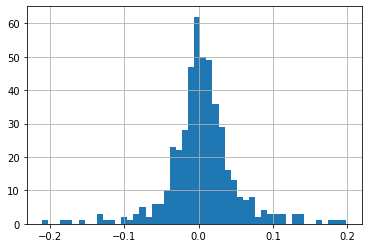

In [ ]:
TSLA_stock['returns'].hist(bins=50)

<AxesSubplot:>

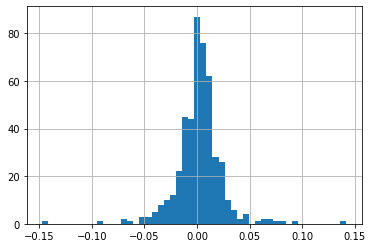

In [ ]:
MSFT_stock['returns'].hist(bins=50)

<AxesSubplot:>

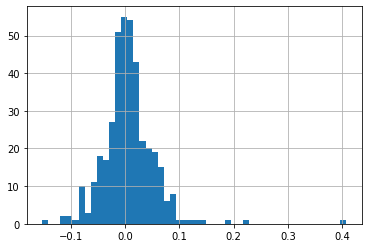

In [ ]:
ZOOM_stock['returns'].hist(bins=50)

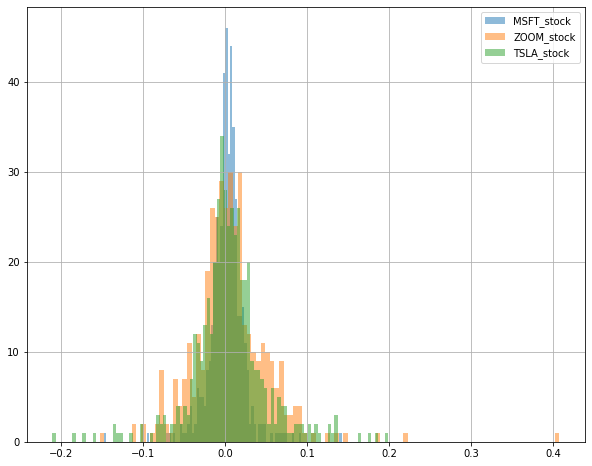

In [ ]:
MSFT_stock['returns'].hist(bins=100,label='MSFT_stock',figsize=(10,8),alpha=0.5)
ZOOM_stock['returns'].hist(bins=100,label='ZOOM_stock',alpha=0.5)
TSLA_stock['returns'].hist(bins=100,label='TSLA_stock',alpha=0.5)
plt.legend()

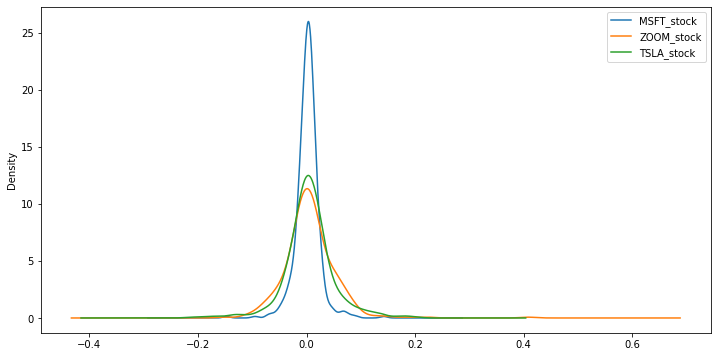

In [ ]:
MSFT_stock['returns'].plot(kind='kde',label='MSFT_stock',figsize=(12,6))
ZOOM_stock['returns'].plot(kind='kde',label='ZOOM_stock')
TSLA_stock['returns'].plot(kind='kde',label='TSLA_stock')
plt.legend()


<AxesSubplot:>

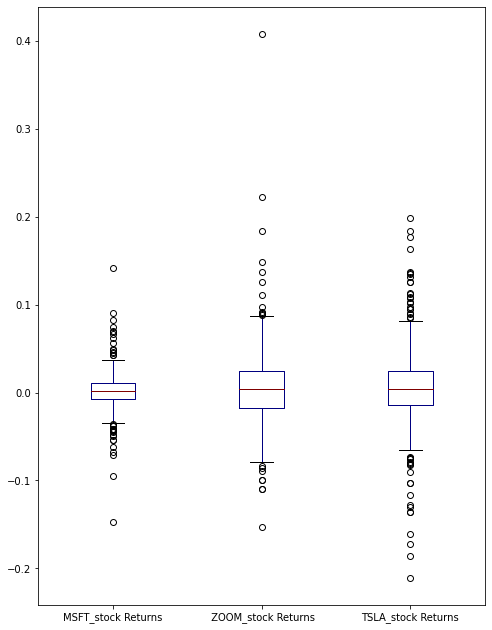

In [ ]:
box_df = pd.concat([MSFT_stock['returns'],ZOOM_stock['returns'],TSLA_stock['returns']],axis=1)
box_df.columns = ['MSFT_stock Returns',' ZOOM_stock Returns','TSLA_stock Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

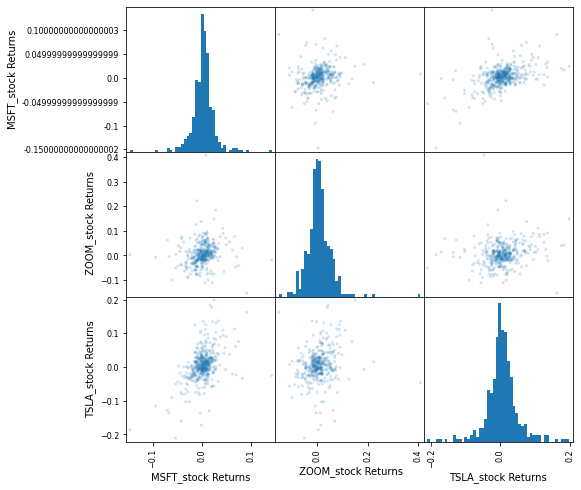

In [ ]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

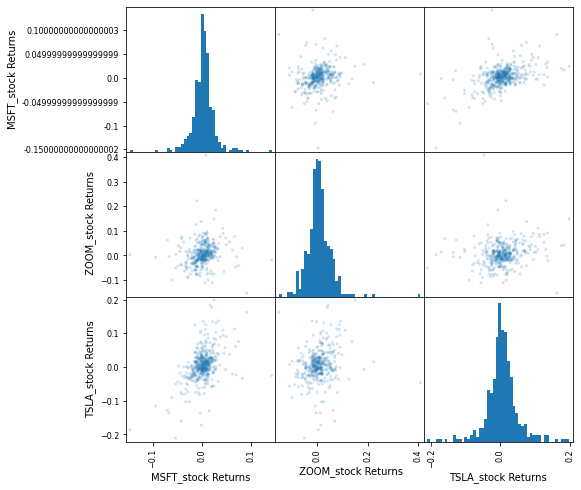

In [ ]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

<AxesSubplot:xlabel=' ZOOM_stock Returns', ylabel='MSFT_stock Returns'>

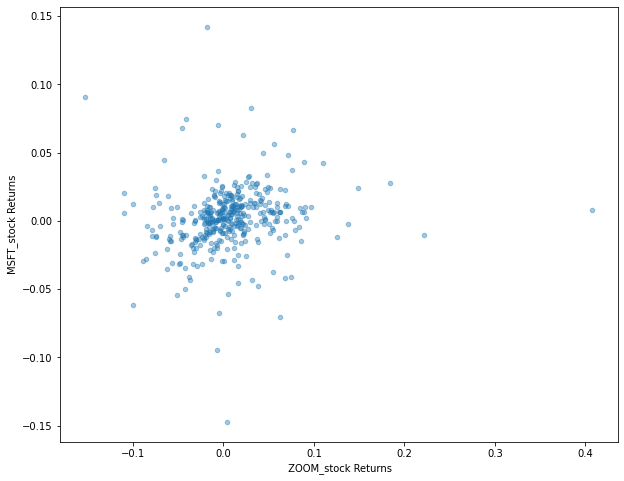

In [ ]:
box_df.plot(kind='scatter',x=' ZOOM_stock Returns',y='MSFT_stock Returns',alpha=0.4,figsize=(10,8))

## Daily Return and Cumulative Return

In [ ]:
MSFT_stock['Cumulative Return'] = (1 + MSFT_stock['returns']).cumprod()

MSFT_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,98.860214,3.517032e+09,NaN,NaN
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,95.223351,4.262168e+09,-0.036788,0.963212
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,99.652115,4.393723e+09,0.046509,1.008010
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,99.779205,3.624086e+09,0.001275,1.009296
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,100.502670,3.247244e+09,0.007251,1.016614


In [ ]:
TSLA_stock['Cumulative Return'] = (1 + TSLA_stock['returns']).cumprod()
ZOOM_stock['Cumulative Return'] = (1 + ZOOM_stock['returns']).cumprod()

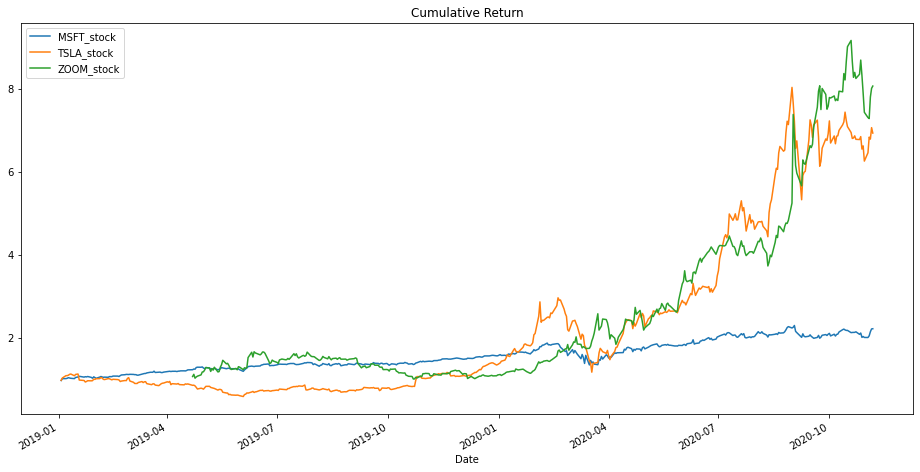

In [ ]:
MSFT_stock['Cumulative Return'].plot(label='MSFT_stock',figsize=(16,8),title='Cumulative Return')
TSLA_stock['Cumulative Return'].plot(label='TSLA_stock')
ZOOM_stock['Cumulative Return'].plot(label='ZOOM_stock')
plt.legend()


In [ ]:
from fbprophet import Prophet

In [ ]:
MSFT_stock['ds'] = MSFT_stock.index
MSFT_stock['y'] = MSFT_stock.Open

m = Prophet()
m.fit(MSFT_stock)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
828,2021-11-02
829,2021-11-03
830,2021-11-04
831,2021-11-05
832,2021-11-06


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
828,2021-11-02,264.480553,180.297752,351.490936
829,2021-11-03,264.454392,181.887667,348.682850
830,2021-11-04,264.470521,183.308874,351.080864
831,2021-11-05,264.680107,182.084709,351.905134
832,2021-11-06,263.754254,180.125064,351.617704


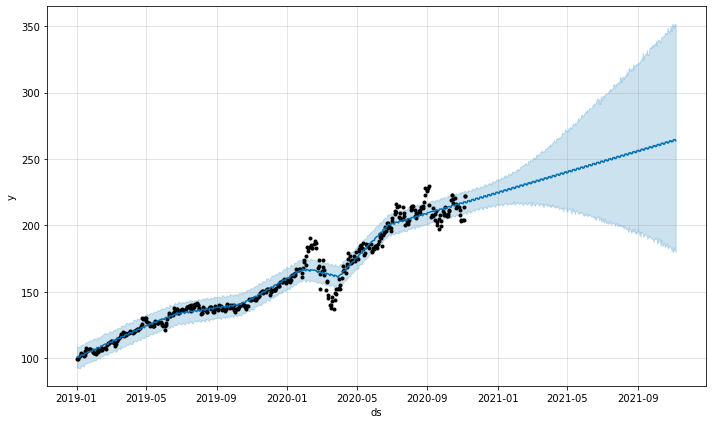

In [ ]:
fig1 = m.plot(forecast)

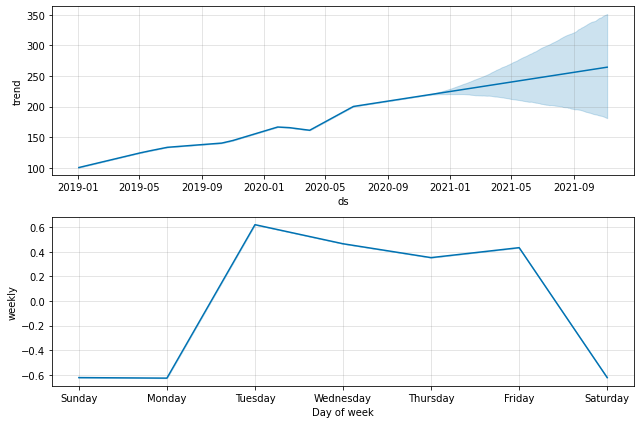

In [ ]:
fig2 = m.plot_components(forecast)

<AxesSubplot:xlabel='Date'>

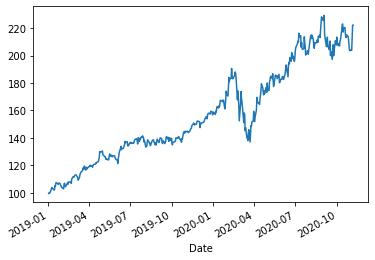

In [ ]:
MSFT_stock['Open'].plot()

In [ ]:
import statsmodels.api as sm

In [ ]:
MSFT_stock_cycle, MSFT_stock_trend = sm.tsa.filters.hpfilter(MSFT_stock['Open'])

In [ ]:
MSFT_stock_cycle

Date
2019-01-02   -1.311918
2019-01-03   -1.097494
2019-01-04   -1.812243
2019-01-07   -0.224671
2019-01-08    0.847869
                ...   
2020-11-02   -8.431408
2020-11-03   -8.845880
2020-11-04    1.239842
2020-11-05    9.198111
2020-11-06    9.350548
Name: Open_cycle, Length: 468, dtype: float64

In [ ]:
MSFT_stock['trend'] = MSFT_stock_trend

In [ ]:
MSFT_stock['trend']

Date
2019-01-02    100.861921
2019-01-03    101.197493
2019-01-04    101.532244
2019-01-07    101.864670
2019-01-08    102.192132
                 ...    
2020-11-02    212.721402
2020-11-03    212.735880
2020-11-04    212.780163
2020-11-05    212.841883
2020-11-06    212.909447
Name: trend, Length: 468, dtype: float64

<AxesSubplot:xlabel='Date'>

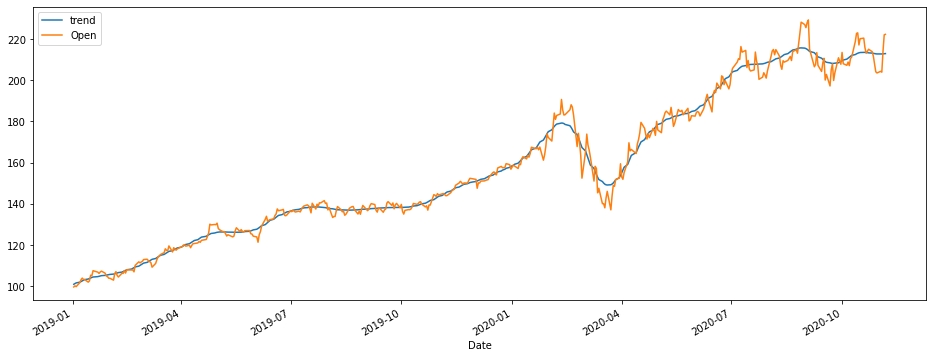

In [ ]:
MSFT_stock[["trend", "Open"]].plot(figsize=(16,6))

In [ ]:
TSLA_stock['ds'] = TSLA_stock.index
TSLA_stock['y'] = TSLA_stock.Open

m = Prophet()
m.fit(TSLA_stock)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Python
TSLA_stock['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(TSLA_stock)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# future = m.make_future_dataframe(periods=1826)
# future['cap'] = 600
# fcst = m.predict(future)
# fig = m.plot(fcst)

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
828,2021-11-02
829,2021-11-03
830,2021-11-04
831,2021-11-05
832,2021-11-06


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
828,2021-11-02,1136.958087,1029.660624,1241.408457
829,2021-11-03,1138.386277,1029.960322,1245.559028
830,2021-11-04,1139.054611,1027.658532,1245.938576
831,2021-11-05,1140.980461,1031.883548,1250.009090
832,2021-11-06,1142.201501,1037.157758,1245.925892


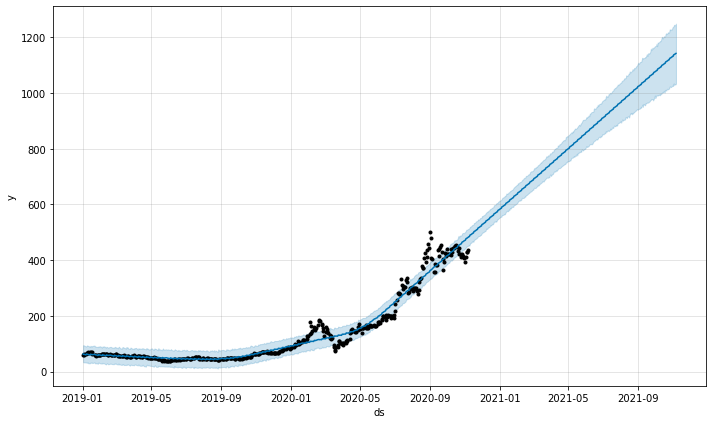

In [ ]:
fig1 = m.plot(forecast)

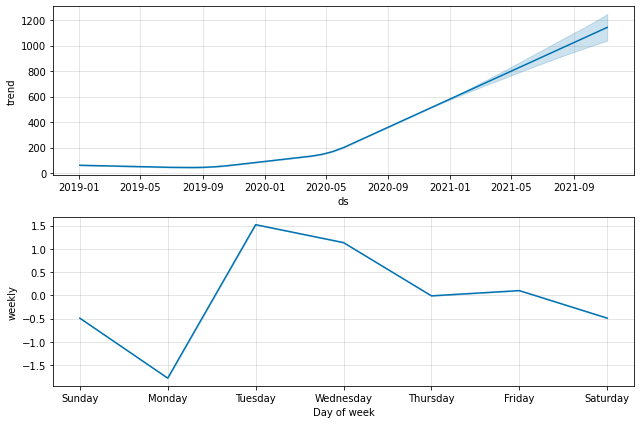

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
ZOOM_stock['ds'] = ZOOM_stock.index
ZOOM_stock['y'] = ZOOM_stock.Open

m = Prophet()
m.fit(ZOOM_stock)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
754,2021-11-02
755,2021-11-03
756,2021-11-04
757,2021-11-05
758,2021-11-06


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
754,2021-11-02,1498.560150,1318.618163,1677.021462
755,2021-11-03,1500.430463,1324.946607,1679.133120
756,2021-11-04,1502.503460,1323.082402,1683.102389
757,2021-11-05,1505.218307,1323.789633,1683.789366
758,2021-11-06,1499.986193,1323.049103,1680.953619


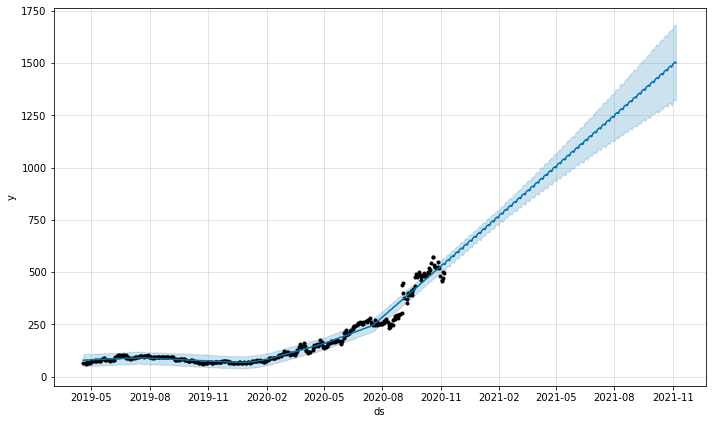

In [ ]:
fig1 = m.plot(forecast)

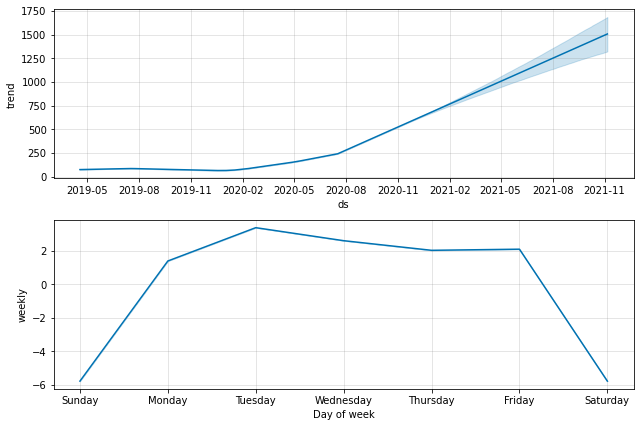

In [ ]:
fig2 = m.plot_components(forecast)